In [2]:
import re
import pandas as pd

In [3]:
f = open('Chat.txt','r',encoding='utf-8')

In [4]:
data = f.read()

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{2}\s-\s'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/s5/w767hn_x4z7db6683kjg2qdr0000gn/T/ipykernel_55995/2716954415.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{2}\s-\s'


In [6]:
masseges = re.split(pattern , data)[1:]
#masseges

In [7]:
dates = re.findall(pattern,data)
#dates

In [8]:
df = pd.DataFrame({'user_message':masseges , 'message_date':dates})

df['message_date'] = pd.to_datetime(df['message_date'],format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)


In [9]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2023-11-30 12:36:00
1,"Prince Makaut created group ""MAKAUT ( Sem-1 Un...",2023-11-29 22:33:00
2,You joined using this group's invite link\n,2023-11-30 12:36:00
3,Prince Makaut: Haa bhai\n,2023-11-30 12:37:00
4,Nitesh Makaut joined using this group's invite...,2023-11-30 17:37:00


In [10]:
df.shape

(4354, 2)

In [11]:
# Separate users and message

users =[]
messsages = []

for mssg in df['user_message']:
    entry = re.split('([\w\W]+?):\s' , mssg)
    if entry[1:]:
        users.append(entry[1])
        messsages.append(entry[2])
    else:
        users.append('group_notification')
        messsages.append(entry[0])

df['users'] = users
df['message'] = messsages

df.drop(columns=['user_message'],inplace=True)


<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
/var/folders/s5/w767hn_x4z7db6683kjg2qdr0000gn/T/ipykernel_55995/337832967.py:7: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s' , mssg)


In [12]:
df.sample(10)

,date,users,message
1558,2024-07-04 14:53:00,Shivam makaut,SHIVAM ANAND\n
1986,2024-08-16 18:06:00,Sritama Makaut,Form fill krte waqt koi dikkat aye to idhr bta...
62,2023-12-07 18:22:00,Pulak Makaut,passing marks nhi attendance chahiye\n
3521,2025-05-05 14:08:00,Sritama Makaut,<Media omitted>\n
1052,2024-04-14 00:55:00,Shivam makaut,Happy Birthday @⁨Amar Kumar Sharma Makaut⁩ 🎉🎉🎉\n
2196,2024-10-26 09:42:00,Hritik Makaut,https://docs.google.com/forms/d/e/1FAIpQLSdBW3...
3099,2025-02-12 22:06:00,Payra Makaut,<Media omitted>\n
828,2024-03-15 15:32:00,Shivam makaut,You can also do it yourself BRO☺️\n
1230,2024-05-31 10:45:00,+91 77973 95173,?\n
624,2024-02-14 13:03:00,Prince Makaut,Puja start hone wala hai soo sab log academy b...


In [13]:
df['year']=df['date'].dt.year

In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df.head()

,date,users,message,year,month
0,2023-11-30 12:36:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November
1,2023-11-29 22:33:00,group_notification,"Prince Makaut created group ""MAKAUT ( Sem-1 Un...",2023,November
2,2023-11-30 12:36:00,group_notification,You joined using this group's invite link\n,2023,November
3,2023-11-30 12:37:00,Prince Makaut,Haa bhai\n,2023,November
4,2023-11-30 17:37:00,group_notification,Nitesh Makaut joined using this group's invite...,2023,November


In [16]:
df['day'] = df['date'].dt.day

In [17]:
df['hour'] = df['date'].dt.hour

In [18]:
df['minute'] = df['date'].dt.minute

In [49]:
df.sample(10)

,users,message,year,month,day,hour,minute
3605,+91 76797 63617,,2025,May,19,14,25
2378,Rohit Makaut,Kal kbse class h\n,2024,November,25,0,23
3782,Rohit Makaut,Saikat h ya sujay sir\n,2025,August,5,11,10
201,MD MOAZZAM Makaut,Morcha sambhalo ab\n,2023,December,20,20,46
1507,Riddhi MAKAUT,Bhaiya boley hai Saturday ko 11 baje lengey cl...,2024,July,4,12,48
4248,Suchana makaut,<Media omitted>\n,2025,September,12,18,20
765,Priyansh Srivastav Makaut,Ye badhiya tha guru 😂\n,2024,March,11,20,51
996,Priyansh Srivastav Makaut,1st April to h happy birthday ka pata nahi 😂\n,2024,April,1,0,44
3794,Payra Makaut,Bhai sticker bana dey iska 😂\n,2025,August,8,11,17
1323,Dipti Makaut,Aur koi date hai submit karne ki?\n,2024,June,7,14,20


In [20]:
df.drop(columns=['date'],inplace=True)

In [21]:
df.head()

,users,message,year,month,day,hour,minute
0,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November,30,12,36
1,group_notification,"Prince Makaut created group ""MAKAUT ( Sem-1 Un...",2023,November,29,22,33
2,group_notification,You joined using this group's invite link\n,2023,November,30,12,36
3,Prince Makaut,Haa bhai\n,2023,November,30,12,37
4,group_notification,Nitesh Makaut joined using this group's invite...,2023,November,30,17,37


In [22]:
df[df['users']=='Prince Makaut'].shape[0]

159

In [23]:
word=[]
for mssg in df['message']:
    word.extend(mssg.split())

In [24]:
word

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'Only',
 'people',
 'in',
 'this',
 'chat',
 'can',
 'read,',
 'listen',
 'to,',
 'or',
 'share',
 'them.',
 'Learn',
 'more.',
 'Prince',
 'Makaut',
 'created',
 'group',
 '"MAKAUT',
 '(',
 'Sem-1',
 'Unofficial',
 'Group)',
 '"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Haa',
 'bhai',
 'Nitesh',
 'Makaut',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Semester',
 'exam',
 'kb',
 'hoga',
 '@\u2068Sritama',
 'Makaut\u2069',
 '@\u2068Prince',
 'Makaut\u2069',
 'Feb.',
 'me',
 'Kal',
 'shambhu',
 'sir',
 'class',
 'lenge...',
 'Or',
 'Math',
 'ke',
 'class',
 'ka',
 'koi',
 'guarantee',
 'nahi',
 'hai...',
 'Kyu',
 'ki',
 'kal',
 'ho',
 'sake',
 'tu',
 'new',
 'teacher',
 'aayege',
 'Agar',
 'math',
 'ka',
 'class',
 'nahi',
 'hoga',
 'tu',
 'sambhu',
 'sir',
 'first',
 'period',
 'me',
 'hi',
 'class',
 'lenge...',
 '🙂',
 'shambhu',
 'sir',
 'ka',
 'first',
 'class',
 '

In [56]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("Hi i my name is farhan akhtar www.gmail.com , https://www.youtube.com/watch?dv=Q0QwvZKG_6Q&t=2561s")

In [60]:
links = []
for mssg in df['message']:
    links.extend(extractor.find_urls(mssg))

In [62]:
len(links)

99

In [67]:
df['users'].value_counts().head()

users
Madhusudan Singh Makaut      491
Sritama Makaut               437
Priyansh Srivastav Makaut    279
Nitesh Makaut                168
Prince Makaut                159
Name: count, dtype: int64

In [68]:
import matplotlib.pyplot as plt

In [70]:
x=df['users'].value_counts().head()

In [71]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Madhusudan Singh Makaut'),
  Text(1, 0, 'Sritama Makaut'),
  Text(2, 0, 'Priyansh Srivastav Makaut'),
  Text(3, 0, 'Nitesh Makaut'),
  Text(4, 0, 'Prince Makaut')])

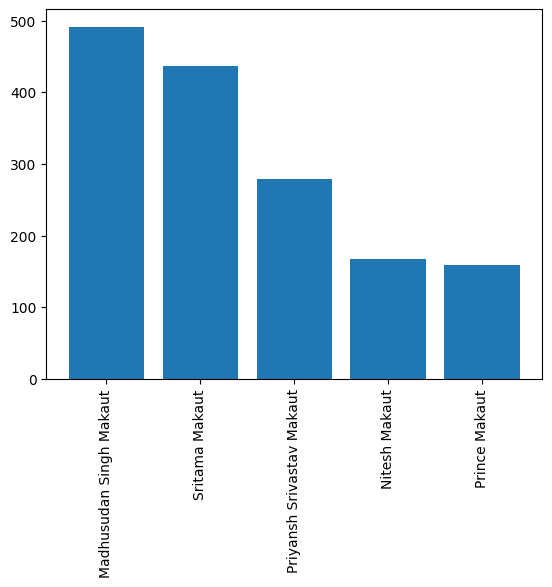

In [75]:
plt.bar(name , count )
plt.xticks(rotation='vertical')